<a href="https://colab.research.google.com/github/ApurvaPatil2401/Predictive-Analysis/blob/main/Customer_Curn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [2]:
# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set seaborn figures' style
sns.set_palette('Set2')
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 21)

In [4]:
# Import dataset
link = 'https://drive.google.com/file/d/1M7JGEh_UCUILHJDdjP5uajjIyeVaoHM2/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
churn_df = pd.read_csv(path)

In [5]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
# Show info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Show desciption of numeric columns
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Create a loop to print unique values of each column
for column in churn_df.columns:
  unique_values = churn_df[column].unique()
  null_count = churn_df[column].isnull().sum()

    # Check if there is only 1 unique value
  if len(unique_values) > 10:
      unique_values = list(unique_values[:5]) + [f"+{len(unique_values) - 5}"]

  print(f"Number of unique values in '{column}' is: {unique_values}")
  print(f"Number of missing values in '{column}' is: {null_count}")

  # Case: if there are only 2 unique values
  if len(unique_values) == 2:
    print("This column is binary-typed, there are only 2 possible unique values")

  # Case: 1 unique
  if len(unique_values) == 1:
    print("This column has only 1 unique value, must be terminated")

  print ('-' * 100)

Number of unique values in 'customerID' is: ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU', '+7038']
Number of missing values in 'customerID' is: 0
----------------------------------------------------------------------------------------------------
Number of unique values in 'gender' is: ['Female' 'Male']
Number of missing values in 'gender' is: 0
This column is binary-typed, there are only 2 possible unique values
----------------------------------------------------------------------------------------------------
Number of unique values in 'SeniorCitizen' is: [0 1]
Number of missing values in 'SeniorCitizen' is: 0
This column is binary-typed, there are only 2 possible unique values
----------------------------------------------------------------------------------------------------
Number of unique values in 'Partner' is: ['Yes' 'No']
Number of missing values in 'Partner' is: 0
This column is binary-typed, there are only 2 possible unique values
-----------------

In [9]:
#Data transformation begin
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Clone dataset for data transformation
churn_data = churn_df.copy()

In [11]:
# Digitize all columns with 2-4 unique values
churn_data['gender'] = churn_data['gender'].replace({'Male': 0, 'Female': 1})
churn_data['Partner'] = churn_data['Partner'].replace({'No': 0, 'Yes': 1})
churn_data['Dependents'] = churn_data['Dependents'].replace({'No': 0, 'Yes': 1})
churn_data['PhoneService'] = churn_data['PhoneService'].replace({'No': 0, 'Yes': 1})
churn_data['MultipleLines'] = churn_data['MultipleLines'].replace({'No': 0, 'Yes': 1, 'No phone service': 2})
churn_data['InternetService'] = churn_data['InternetService'].replace({'No': 0, 'DSL': 1, 'Fiber optic': 2})
churn_data['OnlineSecurity'] = churn_data['OnlineSecurity'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
churn_data['OnlineBackup'] = churn_data['OnlineBackup'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
churn_data['DeviceProtection'] = churn_data['DeviceProtection'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
churn_data['TechSupport'] = churn_data['TechSupport'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
churn_data['StreamingTV'] = churn_data['StreamingTV'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
churn_data['StreamingMovies'] = churn_data['StreamingMovies'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
churn_data['Contract'] = churn_data['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
churn_data['PaperlessBilling'] = churn_data['PaperlessBilling'].replace({'No': 0, 'Yes': 1})
churn_data['PaymentMethod'] = churn_data['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
churn_data['Churn'] = churn_data['Churn'].replace({'No': 0, 'Yes': 1})

In [12]:
# Check non-numeric values of "TotalCharges"
non_numeric_unique_values = churn_data['TotalCharges'][~churn_data['TotalCharges'].apply(pd.to_numeric, errors='coerce').notna()].unique()
non_numeric_unique_values

array([' '], dtype=object)

In [13]:
# Fill the blank values with the mean of the whole column
numeric_values = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

# Get mean
mean_total = numeric_values[numeric_values.notnull()].mean()
mean_total

2283.300440841866

In [14]:
# Replace the blank value with the mean
churn_data['TotalCharges'] = churn_data['TotalCharges'].replace({' ': mean_total})
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype('float')

In [15]:
#drop index column
churn_data = churn_data.drop('customerID', axis=1)

In [16]:
#final check
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [17]:
# Output view
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,1,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,1,0,1,1,11,0,2,1,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,0,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,74.40,306.60,1


Explratory Data Analysis


<Axes: >

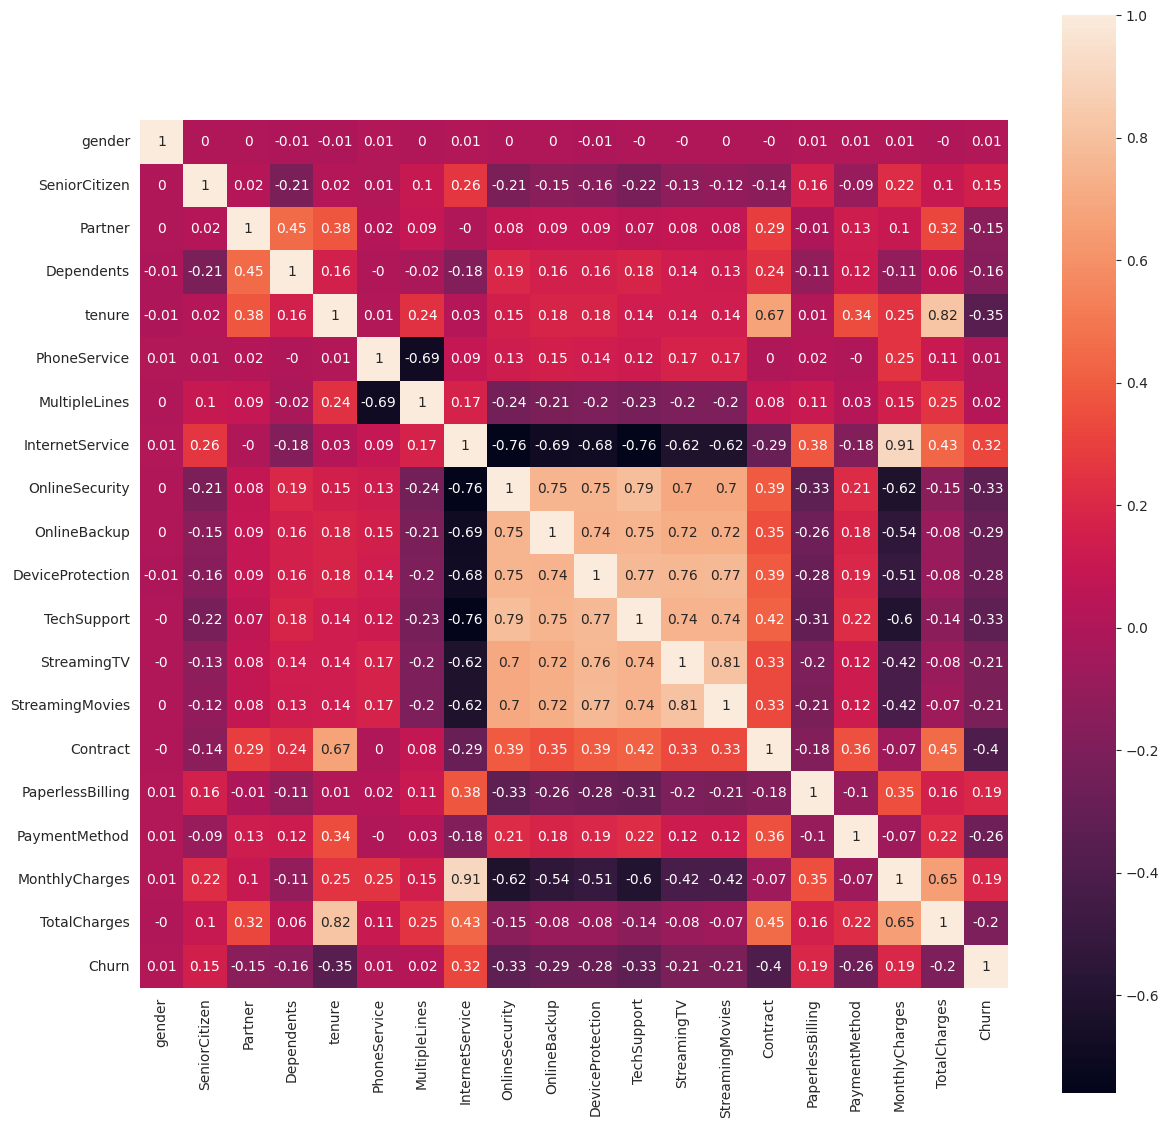

In [18]:
#Correlation Heatmap
# Construct the heatmap
fig, ax = plt.subplots(1,1, figsize = (14, 14))
sns.heatmap(np.round(churn_data.corr(), 2), annot=True, ax = ax, square=True)

Upon initial observation, the **Correlation Heatmap** displays a vibrant spectrum, indicating diverse correlations present within the dataset. Generally, most columns exhibit connections ranging from slight to robust. Notably, certain columns are significantly bonded, boasting correlation rates exceeding **80%** for each paired relationship.

*Correlation Score Categories*:
- **0 to 0.05**: No Correlations
- **0.05 to 0.2**: Very weak Correlation
- **0.2 to 0.4**: Weak Correlation
- **0.4 to 0.6**: Fairly Strong Correlation
- **0.6 to 0.8**: Very Strong Correlation
- **Above 0.8**: Almost absolute Correlation

Here are some early assumptions that I stated after a short period of time for observation:

1. The set of 7 columns: **InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies**, are well-connected to each other, with the lowest correlation score of **62%**, and the peak rate can reach up to **81% (Very Strong)**

2. The only column that does not maintain a correlation with any other columns is **gender**, with the score in range from **0 to 0.01**

3. Some random columns have a very high Correlation Score such as: **MonthlyCharges + InternetService** with 91%, **tenure + TotalCharges** with 82%, **MultipleLines + PhoneService** with 69%

4. The target column **Churn** have weak connection with every column except **gender**

5. All 19 columns can be used for training model.



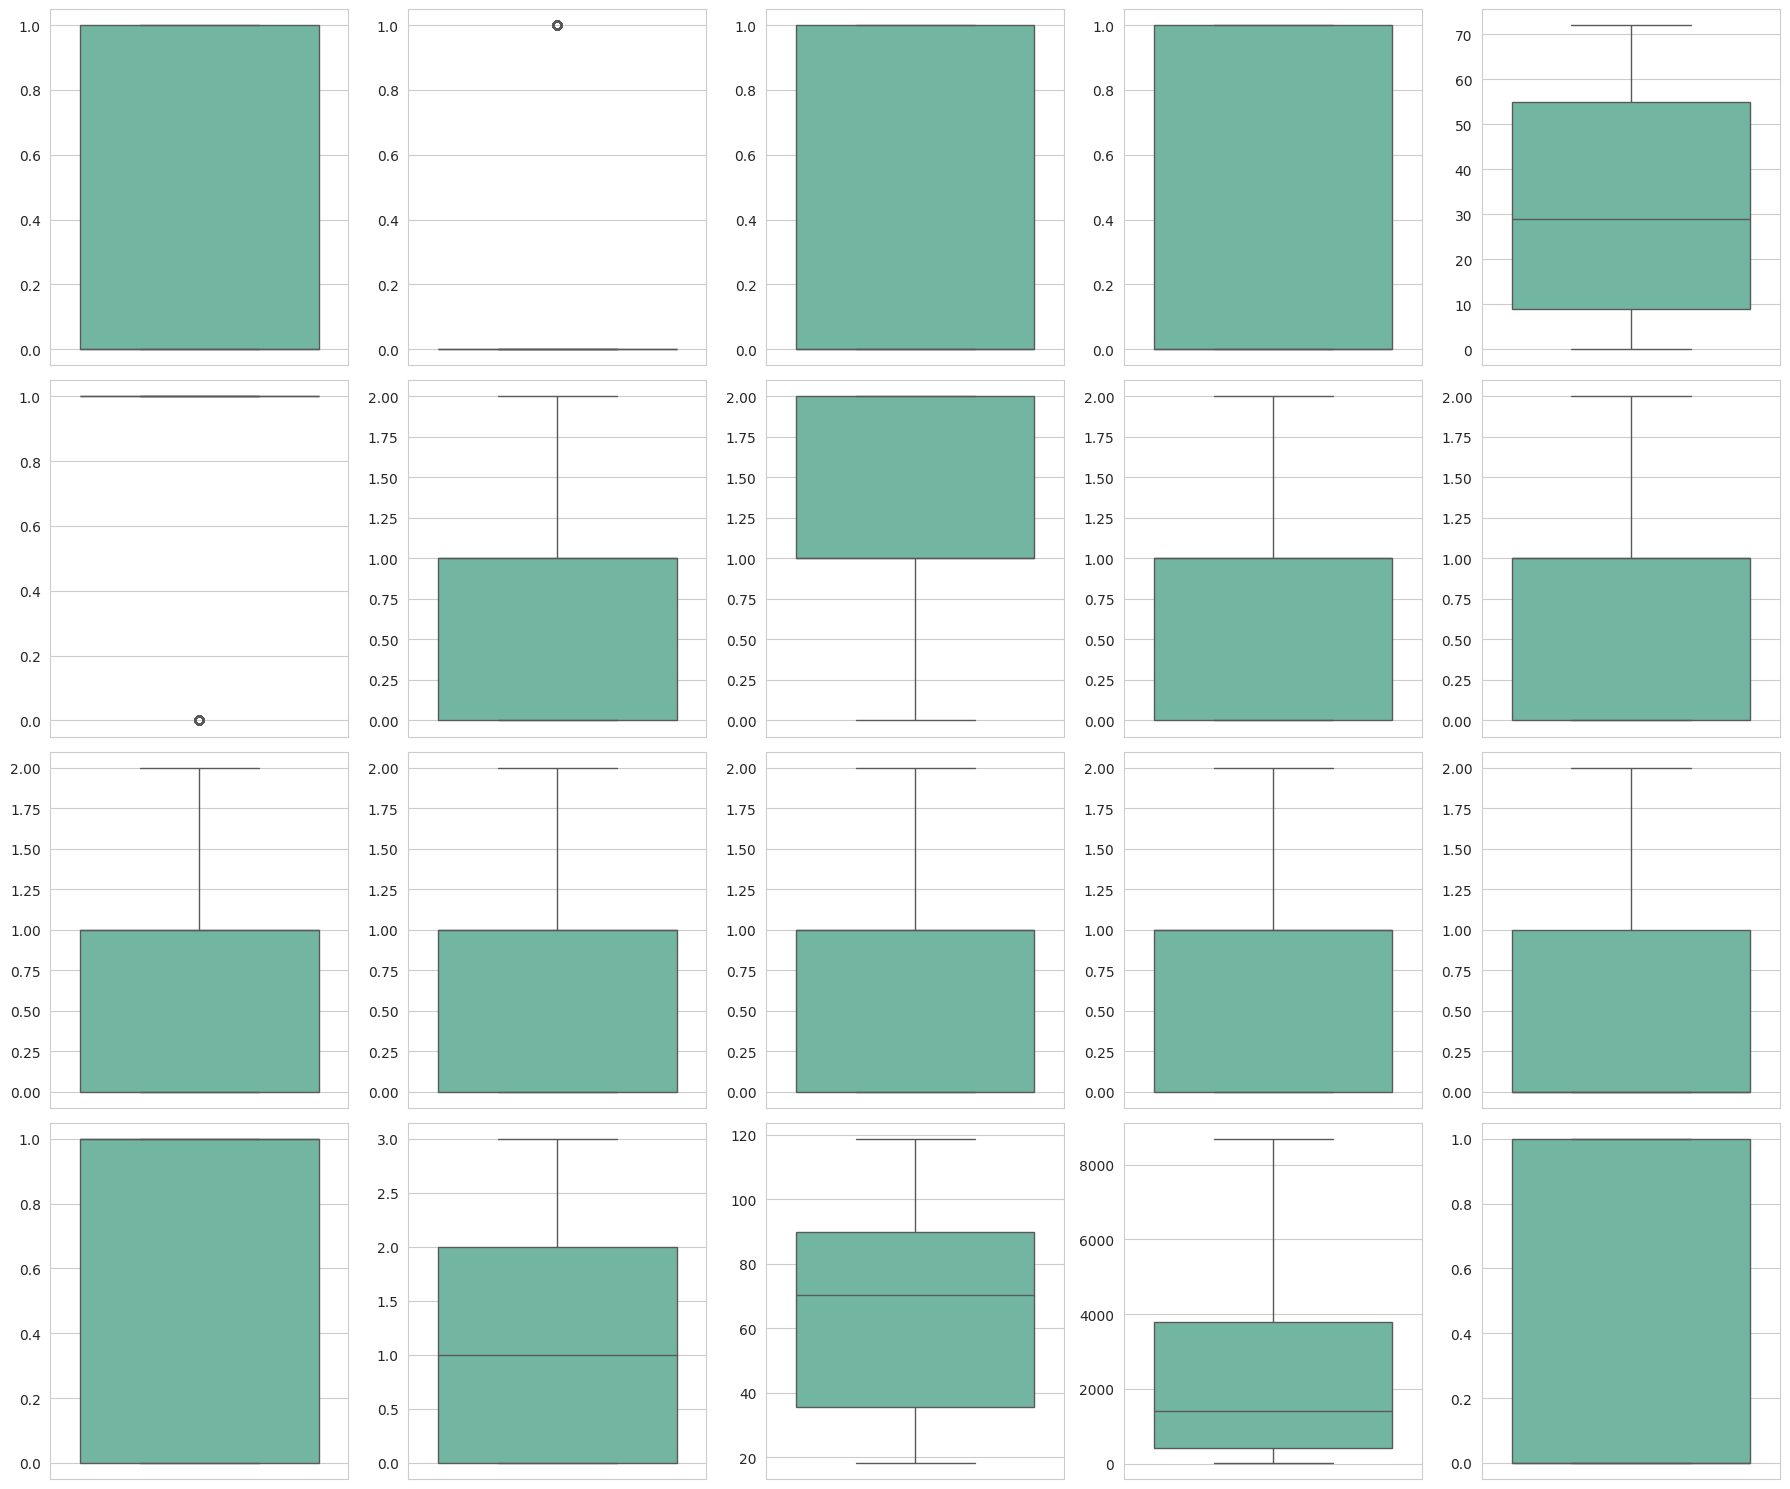

In [19]:
#Boxplot
fig, ax = plt.subplots(4, 5, figsize = (18, 15))
count = 0
for i in range(4):
    for j in range(5):
        sns.boxplot(churn_data[churn_data.columns[count]], ax = ax[i][j])
        ax[i][j].set_ylabel("")
        count += 1
plt.tight_layout()

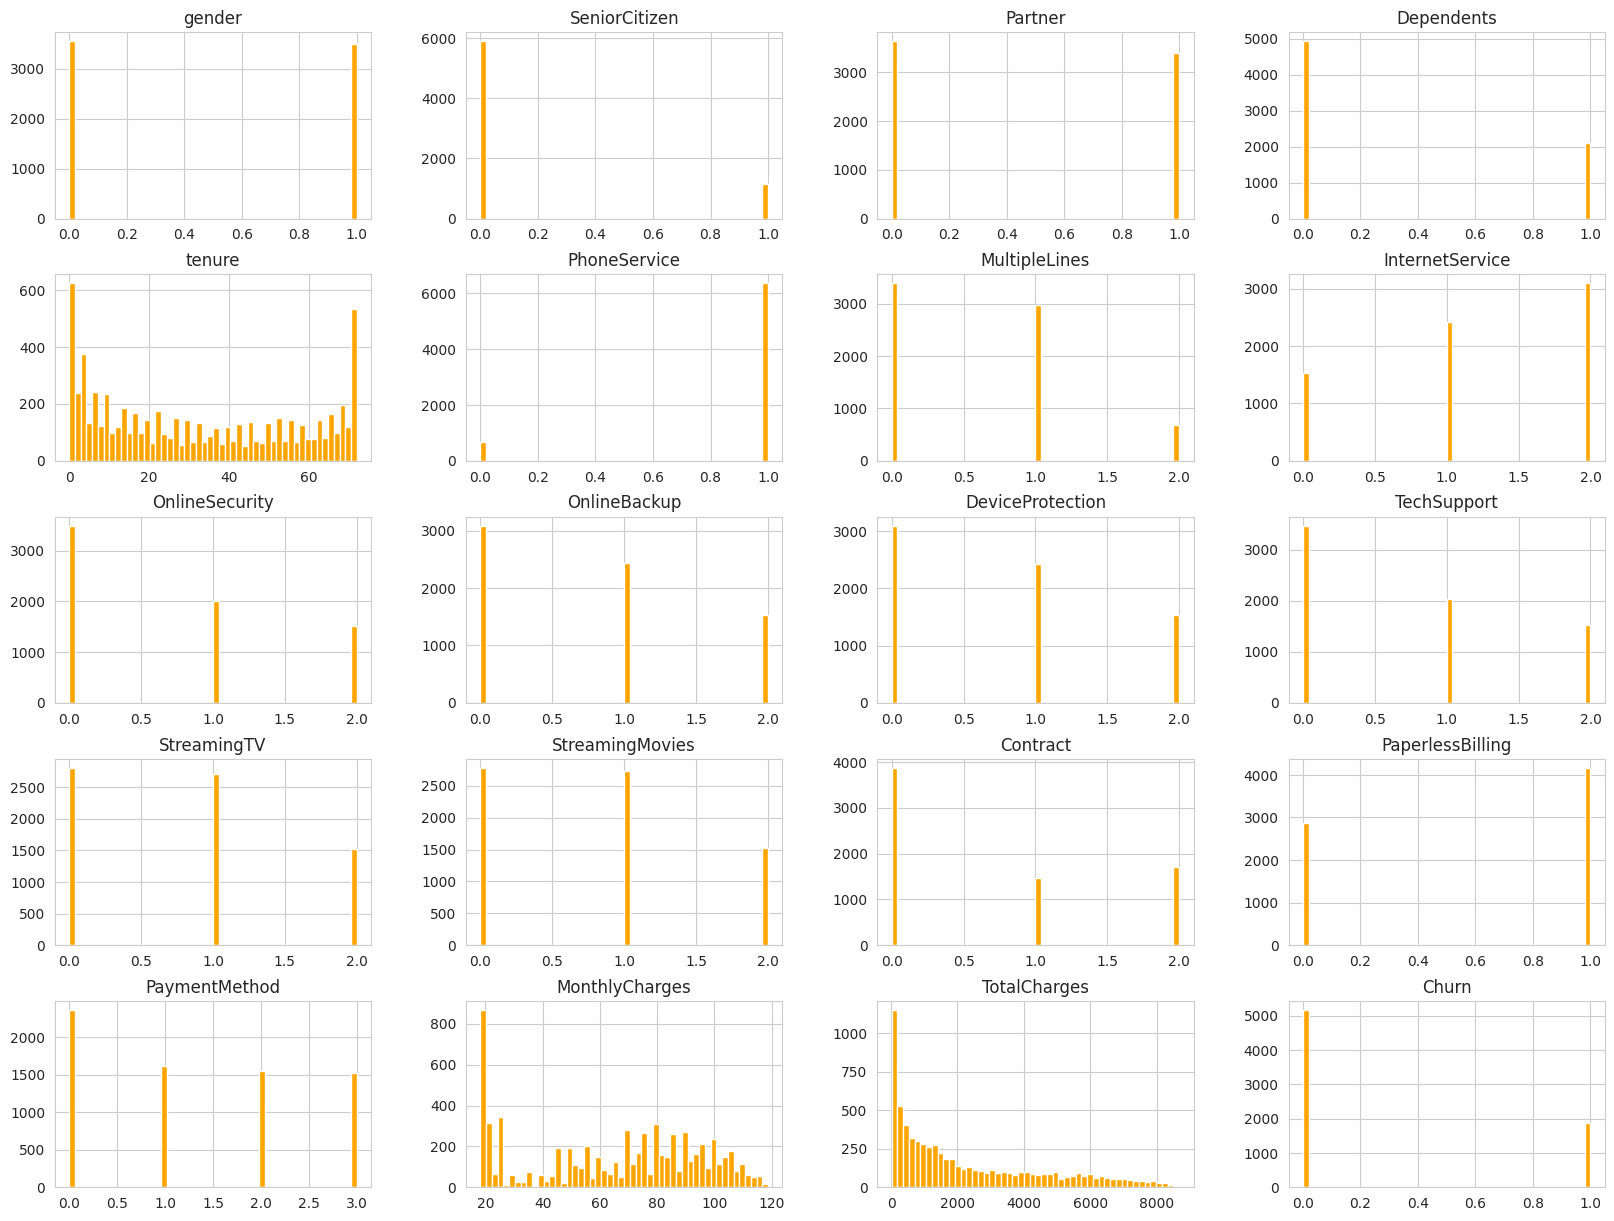

In [20]:
# Distribution of data using Histogram
churn_data.hist(bins=50, figsize=(20,15), color='orange')
plt.show()

Displayed above are 20 bar charts, each presenting the distribution of values within a column. Arranged in rows of four, spanning across five rows in total, these compact yet lucid charts offer a clear and easily discernible overview of the data.

**Assumptions:**
1. There is not much difference of the distribution between the 2 values in columns: **gender** and **Partner**
2. There are some notable differences between the value 0 and 1 in some columns: **SeniorCitizen** with the ratio of 0:1 = 80%, **Dependants** with the ratio of 0:1 = 60%, **PhoneService** with the ratio of 0:1 = 10%, **Churn** with the ratio of 0:1 = 70%
3. Data in column **tenure** is skew-distributed to both left and right sides
4. Data in column **MonthlyCharges** and **TotalCharges** is left skew distributed
5. The columns exhibiting three distinct values generally showcase a relatively balanced distribution, with minimal discrepancies among the counts of each value.

## **Explore Traget Column Churn**

In [21]:
# Value Counts
target_count = churn_data['Churn'].value_counts()
target_count

,count
Churn,
0,5174
1,1869


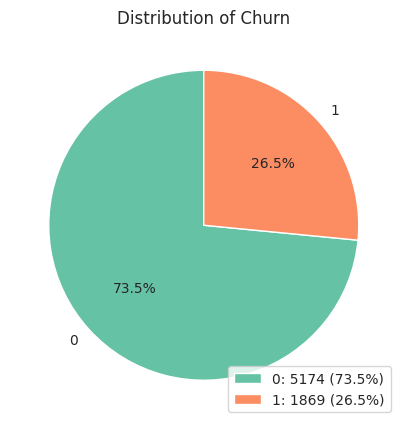

In [22]:
# Plotting pie chart
plt.figure(figsize=(5, 6))
patches, texts, autotexts = plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%', startangle=90)
labels = [f'{target_count.index[i]}: {target_count[i]} ({autotexts[i].get_text()})' for i in range(len(target_count))]
plt.legend(patches, labels, loc="best")
plt.title('Distribution of Churn')
plt.show()

Seeing the value counts, we know that:
- The rate of customers not returning is **73% (5174 records)**
- The rate of customers returning is **27% (1869 records)**

=> *The target column is heavily imbalanced, so before modelling, there should be a scaling stage to ensure that the data is healthy and balance*

# **Relation between Gender and Churn**

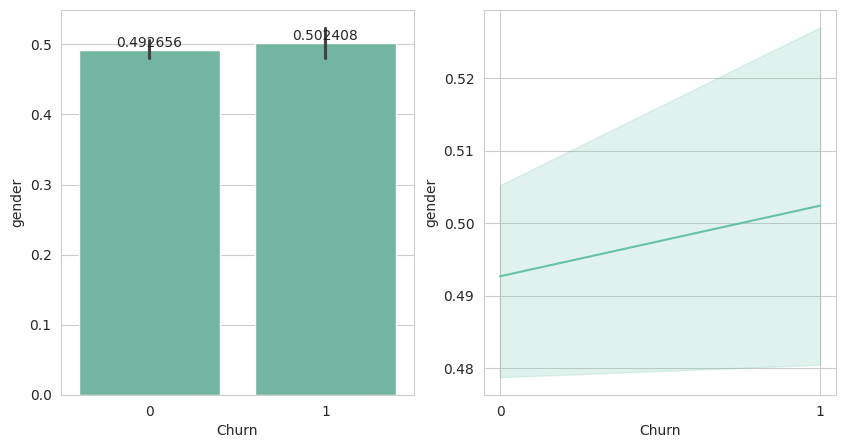

In [23]:
# Bar chart
fig, ax  = plt.subplots(1, 2, figsize = (10,5))
sns.barplot(x = churn_data['Churn'], y = churn_data['gender'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

# Line chart
sns.lineplot(x = churn_data['Churn'], y = churn_data['gender'], ax = ax[1])
ax[1].set_xticks([0, 1])

**Assumptions**:

- It seems like the **gender** does not affect the output of the target column **Churn**

# **Relation between SeniorCitizen and Churn**

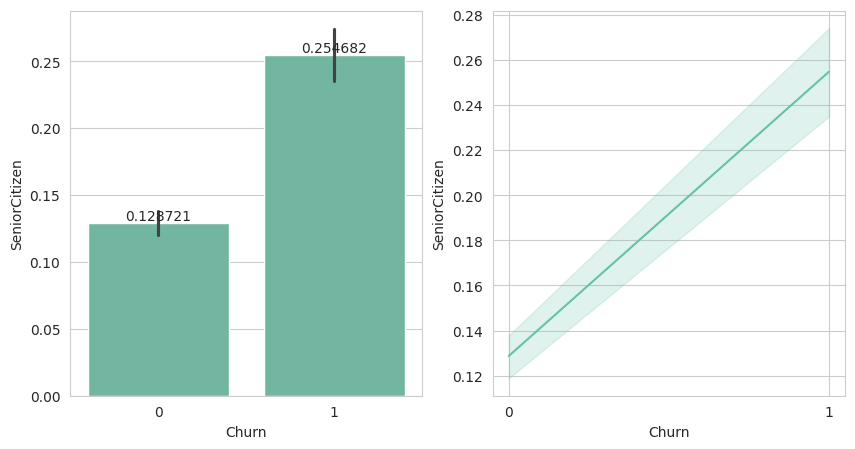

In [24]:
# Bar chart
fig, ax  = plt.subplots(1, 2, figsize = (10,5))
sns.barplot(x = churn_data['Churn'], y = churn_data['SeniorCitizen'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

# Line chart
sns.lineplot(x = churn_data['Churn'], y = churn_data['SeniorCitizen'], ax = ax[1])
ax[1].set_xticks([0, 1])

**Assumptions**:

The rate of people who are **SeniorCitizen** that does not make a return is 25%, which is doubled to the rate of people who are **SeniorCitizen** and do return

=> People are more likely to make a return if they are a **Senior Citizen**

## **Relation Between Partner and Churn**

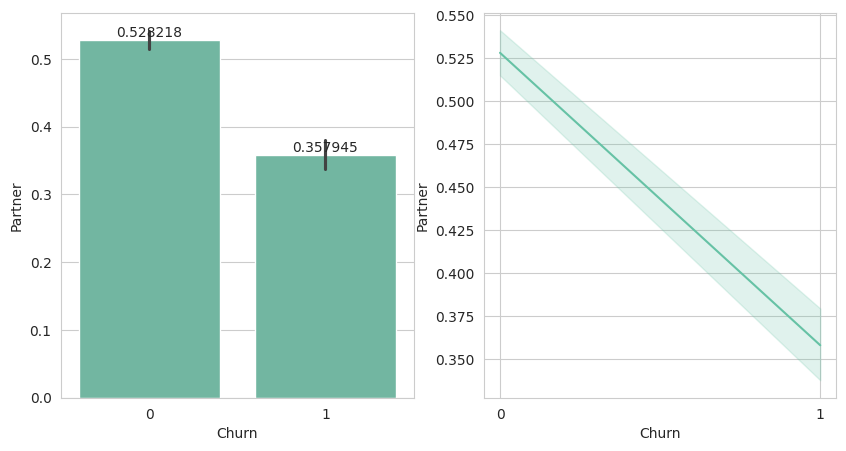

In [25]:
# Bar chart
fig, ax  = plt.subplots(1, 2, figsize = (10,5))
sns.barplot(x = churn_data['Churn'], y = churn_data['Partner'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

# Line chart
sns.lineplot(x = churn_data['Churn'], y = churn_data['Partner'], ax = ax[1])
ax[1].set_xticks([0, 1])

**Assumptions**:

The rate of people who are not a **Partner** that do not make a return is 52%, which is way higher to the rate of people who are a **Partner** that returns(35%)

=> People are less likely to make a return if they are a **Partner**

# **Relation between Dependents and Churn**

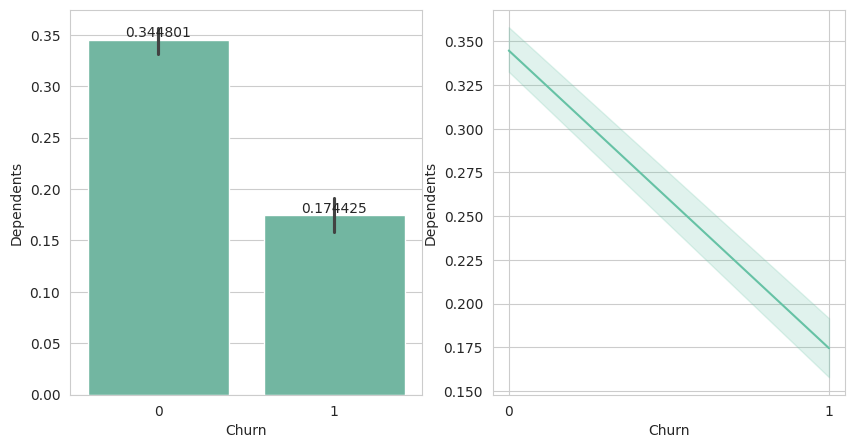

In [29]:
# Bar chart
fig, ax  = plt.subplots(1, 2, figsize = (10,5))
sns.barplot(x = churn_data['Churn'], y = churn_data['Dependents'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

# Line chart
sns.lineplot(x = churn_data['Churn'], y = churn_data['Dependents'], ax = ax[1])
ax[1].set_xticks([0, 1])

**Assumptions**:

The rate of people who are not a **Dependant** that do not make a return is 34%, which is doubled the rate of people who are a **Dependant** who make returns (17%)

# **Relation Between tenure and Churn**

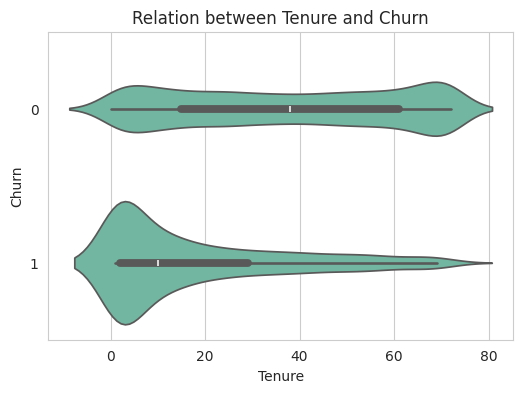

In [30]:
plt.figure(figsize=(6, 4))

sns.violinplot(x='tenure', y='Churn', data=churn_data, orient='h')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.title('Relation between Tenure and Churn')

plt.show()

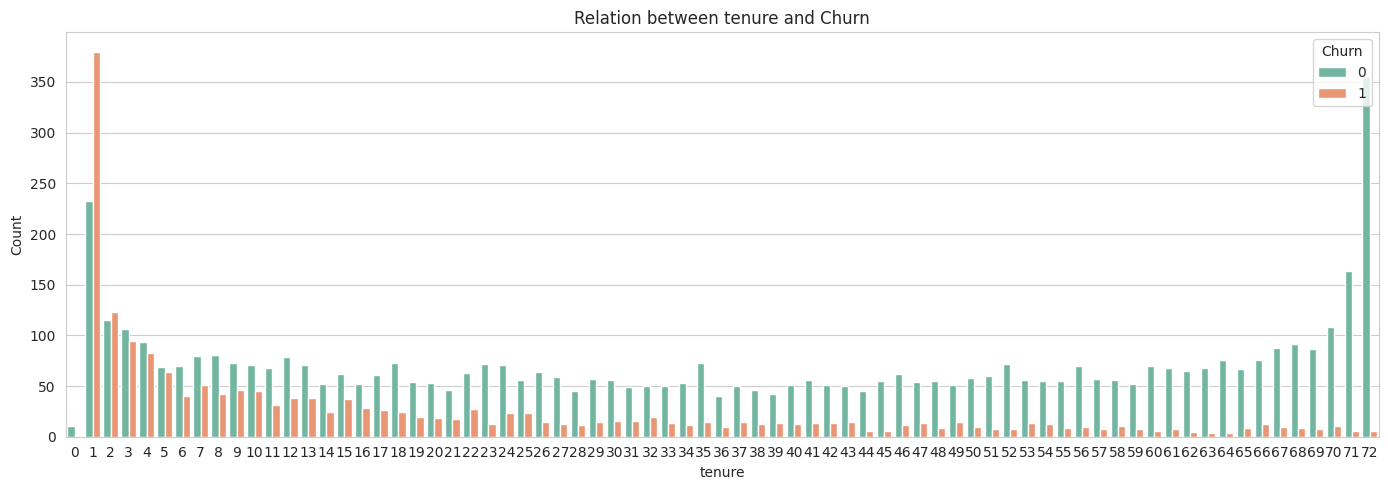

In [31]:
plt.figure(figsize=(14, 5))

sns.countplot(x='tenure', hue='Churn', data=churn_data)
plt.xlabel('tenure')
plt.ylabel('Count')
plt.title('Relation between tenure and Churn')

plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

**Assumptions**:

1. People whose **tenure** is close to 1 have the highest **Churn** rate, which is at approximately 60%

2. People whose **tenure** is close to 172 (max value) have the lowest **Churn** rate, which is at less than 3%

3. The higher **tenure**, the less **Churn** rate.

# **Relation between PhoneService and Churn**

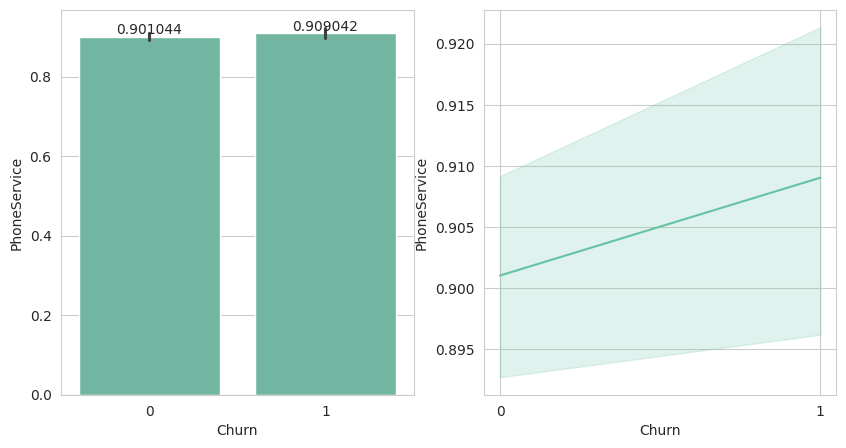

In [32]:
# Bar chart
fig, ax  = plt.subplots(1, 2, figsize = (10,5))
sns.barplot(x = churn_data['Churn'], y = churn_data['PhoneService'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

# Line chart
sns.lineplot(x = churn_data['Churn'], y = churn_data['PhoneService'], ax = ax[1])
ax[1].set_xticks([0, 1])

**Assumptions**:

The distribution or proportion of **Churn** (whether **Churn** is 'Yes' or 'No') within both categories of **PhoneService** (likely 'Yes' and 'No') is heavily skewed towards one of the categories.

# **Relation between MultiLines and Churn**

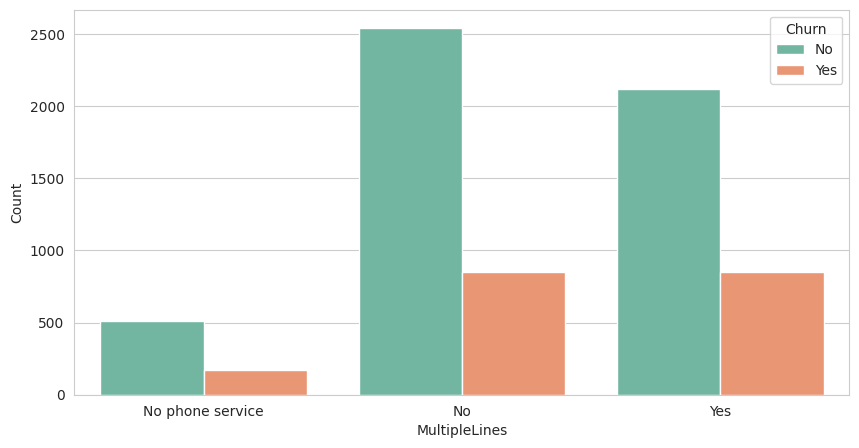

In [33]:
plt.figure(figsize=(10, 5))

sns.countplot(x='MultipleLines', hue='Churn', data=churn_df)
plt.xlabel('MultipleLines')
plt.ylabel('Count')

plt.show()

**Assumptions**:

1. Irrespective of having **MultipleLines** or not, a larger count of customers tends not to churn (**Churn 0**) compared to those who do churn (**Churn 1**).
2. Among the **MultipleLines** categories, '*Yes*' (or 1) and '*No*' (or 0) exhibit a relatively higher count of customers who do not churn (**Churn 0**) compared to those who churn (**Churn 1**).
3. Customers with *No Phone Service* also display a similar trend of a higher count of not churning (**Churn 0**) compared to churning (**Churn 1**), but with a notably smaller count compared to *Yes* and *No* categories.


# **Relation Between InternetServices and Churn**

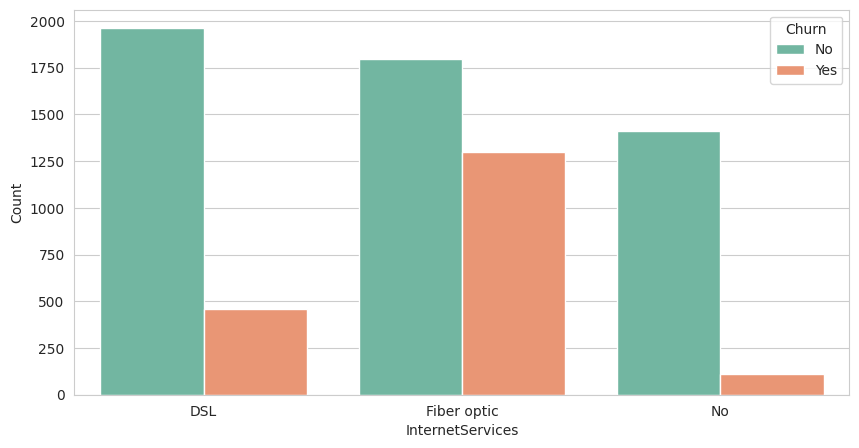

In [34]:
plt.figure(figsize=(10, 5))

sns.countplot(x='InternetService', hue='Churn', data=churn_df)
plt.xlabel('InternetServices')
plt.ylabel('Count')

plt.show()

**Assumptions**:

1. Among the **InternetService** categories, *No* internet service has the most significant difference in counts between **not churning** and **churning**, while *fiber optic* service displays a more balanced count between the two.
2. The type of **internet service** might have an influence on **churn** behavior, with customers having no internet service (*No*) being significantly less likely to **churn** compared to those with **DSL** or **fiber optic** services.


# **Relation between OnlineSecurity and Churn**

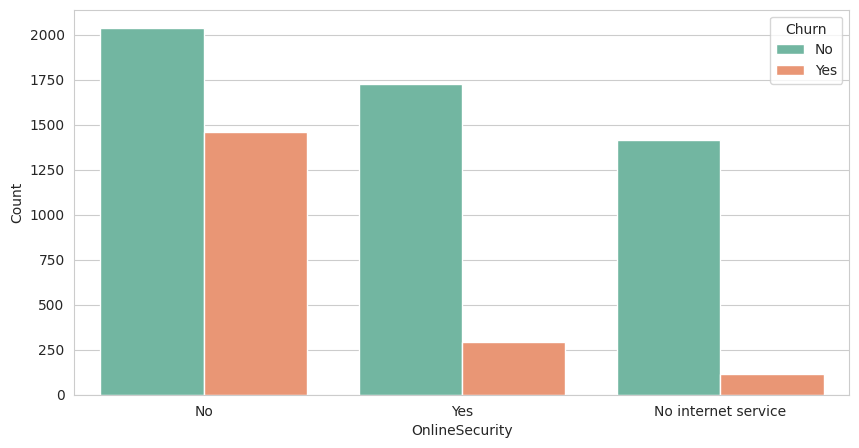

In [35]:
plt.figure(figsize=(10, 5))

sns.countplot(x='OnlineSecurity', hue='Churn', data=churn_df)
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')

plt.show()

**Assumptions**:

1. Customers without online security (*No*) show a higher count of churning (**Churn 1**) compared to those who do not churn (**Churn 0**). This category has a notable difference in counts between **churn** and **non-churn**, indicating a higher churn likelihood for those without online security.
2. Among the **OnlineSecurity** categories, those without online security (*No*) have the most significant difference in counts between **churn** and **non-churn**, indicating a higher churn likelihood. The *Yes* category shows a lower likelihood of churning, while the *No internet service* category also has a notably lower churn likelihood compared to *No*.

# **Relation between DeviceProtection and Churn**

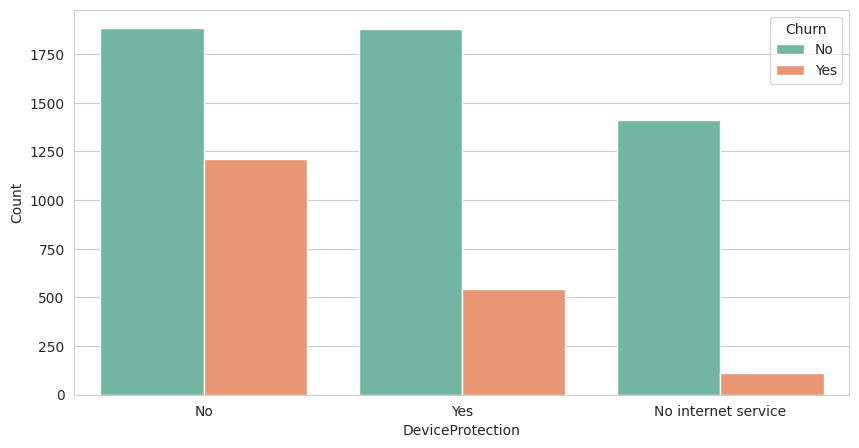

In [36]:
plt.figure(figsize=(10, 5))

sns.countplot(x='DeviceProtection', hue='Churn', data=churn_df)
plt.xlabel('DeviceProtection')
plt.ylabel('Count')

plt.show()

**Assumptions**:

1. Customers without **device protection** (*No*) display a higher count of churning (**Churn 1**) compared to those who do not churn (**Churn 0**). This category indicates a substantial difference in counts between **churn** and **non-churn**, suggesting a higher likelihood of churning for those without **device protection**.
2. Among the **DeviceProtection** categories, those without device protection (*No*) showcase a substantial difference in counts between churn and non-churn, indicating a higher likelihood of churning. The *Yes* category indicates a lower likelihood of churning, while the *No internet service* category also displays notably lower churn likelihood compared to *No*.

# **Relation between TechSupport and Churn**

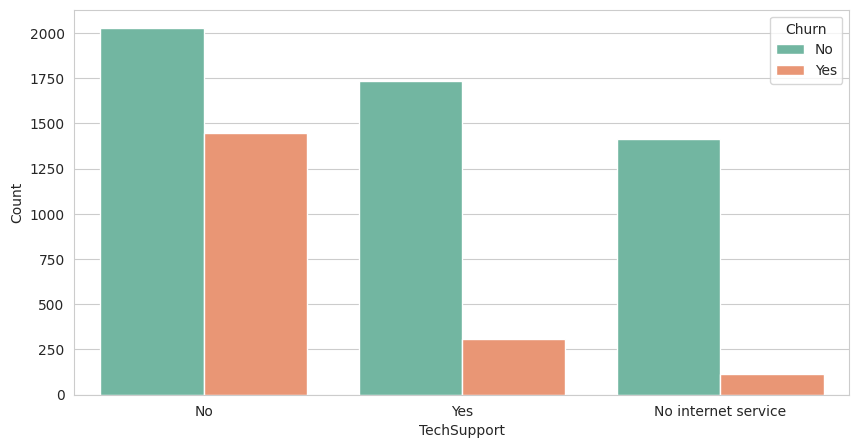

In [37]:
plt.figure(figsize=(10, 5))

sns.countplot(x='TechSupport', hue='Churn', data=churn_df)
plt.xlabel('TechSupport')
plt.ylabel('Count')

plt.show()

**Assumptions**:

1. Customers without **tech support** (*No*) exhibit a relatively higher count of churning (**Churn 1**) compared to those who do not churn (**Churn 0**). This category indicates a sizable proportion of customers churning despite having **no tech support**.
2. Among the **TechSupport** categories, those without tech support (*No*) present a substantial proportion of customers churning compared to those who do not churn. *Yes* category indicates a larger proportion of customers without churn, highlighting the influence of tech support on reducing churn likelihood. *No internet service* category also shows notably lower churn proportions compared to *No*.

# **Relation between StreamingTV and Churn**

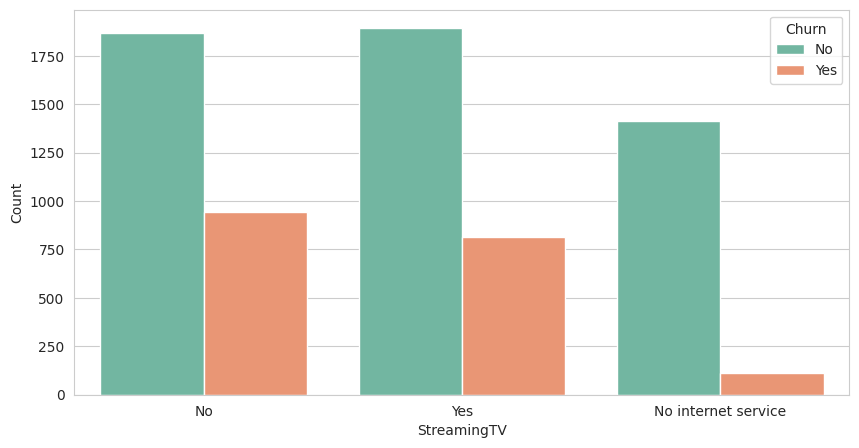

In [38]:
plt.figure(figsize=(10, 5))

sns.countplot(x='StreamingTV', hue='Churn', data=churn_df)
plt.xlabel('StreamingTV')
plt.ylabel('Count')

plt.show()

**Assumptions**:

1. The correlation and distribution observed among each category of **StreamingTV** concerning **Churn** demonstrate a resemblance to the relationship noted between **TechSupport** and **Churn**. The primary distinction lies in the proportional differences exhibited within each class.

# **Relation between StreamingMovies and Churn**

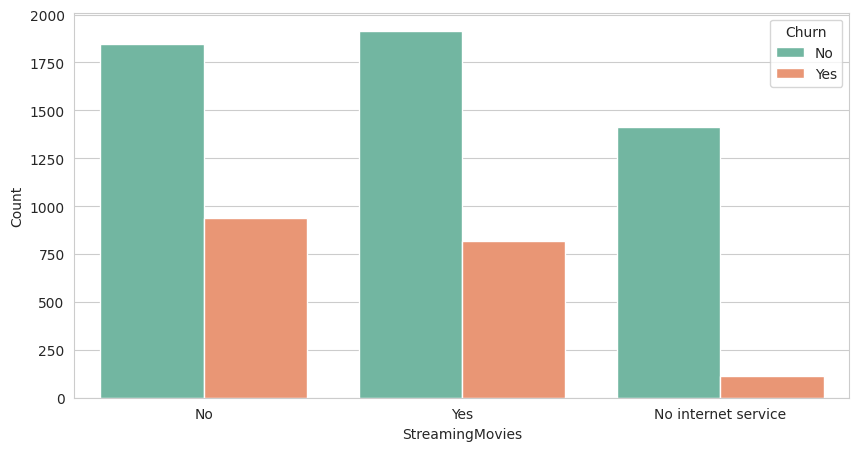

In [39]:
plt.figure(figsize=(10, 5))

sns.countplot(x='StreamingMovies', hue='Churn', data=churn_df)
plt.xlabel('StreamingMovies')
plt.ylabel('Count')

plt.show()

**Assumptions**:

1. Same as all previous relationships, the correlation and distribution observed among each category of **StreamingMovies** concerning **Churn** demonstrate a resemblance to the relationship noted between **StreamingTV** and **Churn**. The primary distinction lies in the proportional differences exhibited within each class.

# **Relation between Contract and Churn**

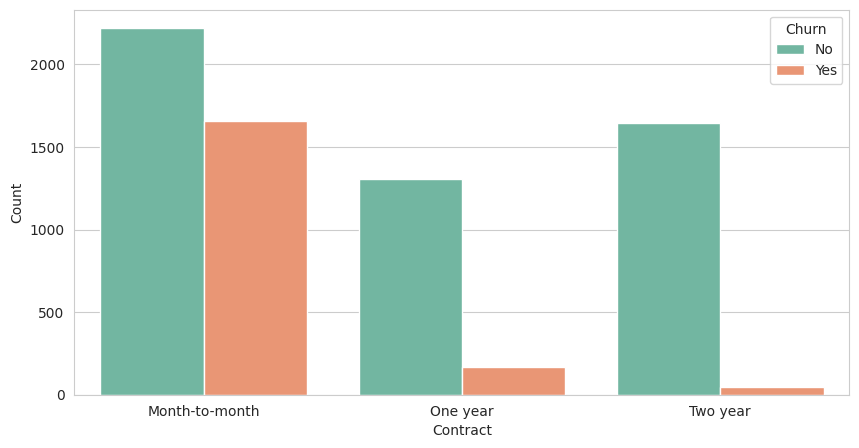

In [40]:
plt.figure(figsize=(10, 5))

sns.countplot(x='Contract', hue='Churn', data=churn_df)
plt.xlabel('Contract')
plt.ylabel('Count')

plt.show()

**Assumptions**:

1. Among the **Contract** categories, *month-to-month* contracts present a higher overall churn rate compared to *longer-term contracts* (*one year* and *two years*). Longer contract durations exhibit comparatively lower overall **churn** rates.
2. The duration of the contract significantly influences **churn** behavior. *Month-to-month* contracts display a higher overall **churn** rate, while *one-year* and *two-year* contracts demonstrate lower overall churn rates.

# **Relation between PaymentMethod and Churn**

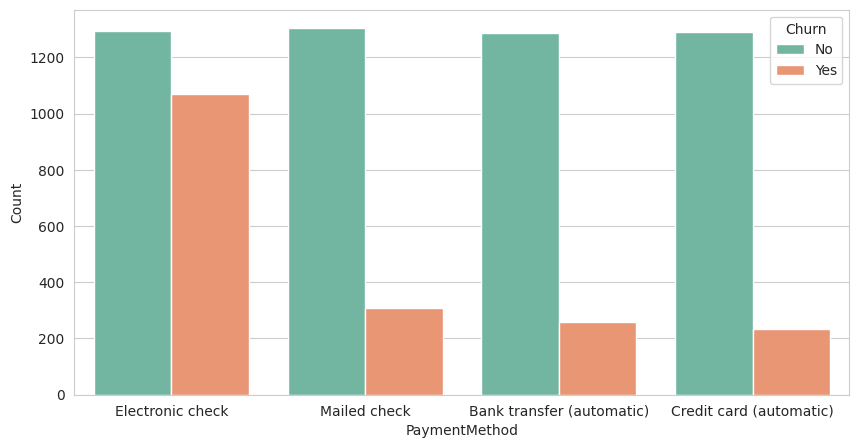

In [41]:
plt.figure(figsize=(10, 5))

sns.countplot(x='PaymentMethod', hue='Churn', data=churn_df)
plt.xlabel('PaymentMethod')
plt.ylabel('Count')

plt.show()

**Assumptions**:

1. The counts of churn (**Churn 1**) and non-churn (**Churn 0**) appear relatively consistent across different **payment** methods. There is a similarity in **churn** rates among customers regardless of the payment method used.
2. Customers using *electronic checks* for **payment** (*Electronic check*) exhibit a slightly higher count of churning (**Churn 1**) compared to other payment methods. There is a subtle trend suggesting a relatively higher **churn** rate associated with *electronic check* payments compared to *mailed check, bank transfer*, or *credit card payments*.

# **Relation between PaperlessBilling and Churn**

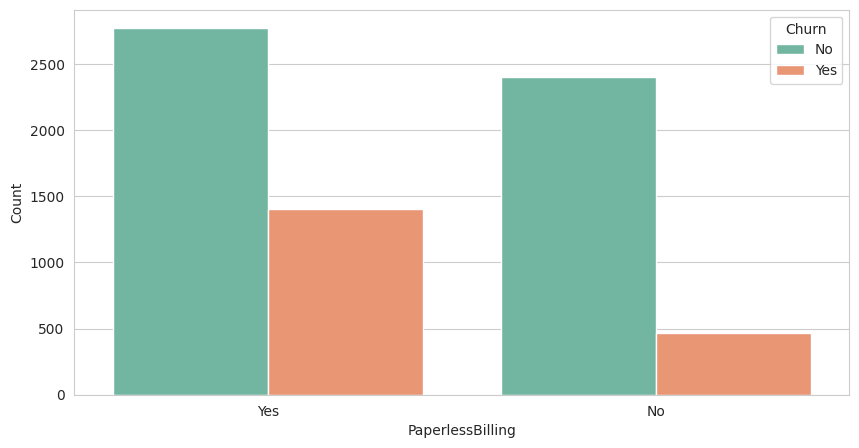

In [42]:
plt.figure(figsize=(10, 5))

sns.countplot(x='PaperlessBilling', hue='Churn', data=churn_df)
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')

plt.show()

**Assumptions**:

1. Customers enrolled in **paperless billing** (*PaperlessBilling = Yes*) exhibit a notably higher count of churning (**Churn 1**) compared to those without paperless billing (*PaperlessBilling = No*). There's a discernible trend suggesting a **higher churn rate** among customers utilizing **paperless billing** services.
2. Customers not enrolled in **paperless billing** (*PaperlessBilling = No*) demonstrate a relatively lower count of churning (**Churn 1**) compared to those who do use paperless billing. There appears to be a **lower churn rate** among customers who opt out of **paperless billing** services.

# **Relation between MonthlyCharges and Churn**

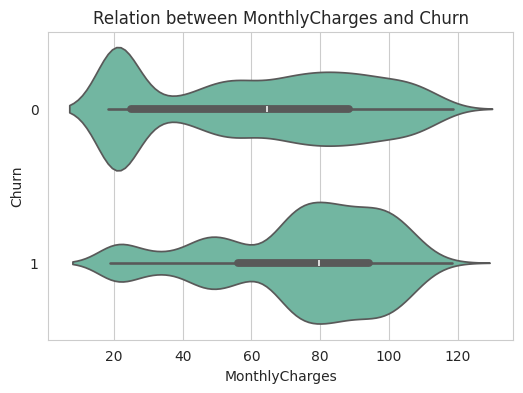

In [43]:
plt.figure(figsize=(6, 4))

sns.violinplot(x='MonthlyCharges', y='Churn', data=churn_data, orient='h')
plt.xlabel('MonthlyCharges')
plt.ylabel('Churn')
plt.title('Relation between MonthlyCharges and Churn')

plt.show()

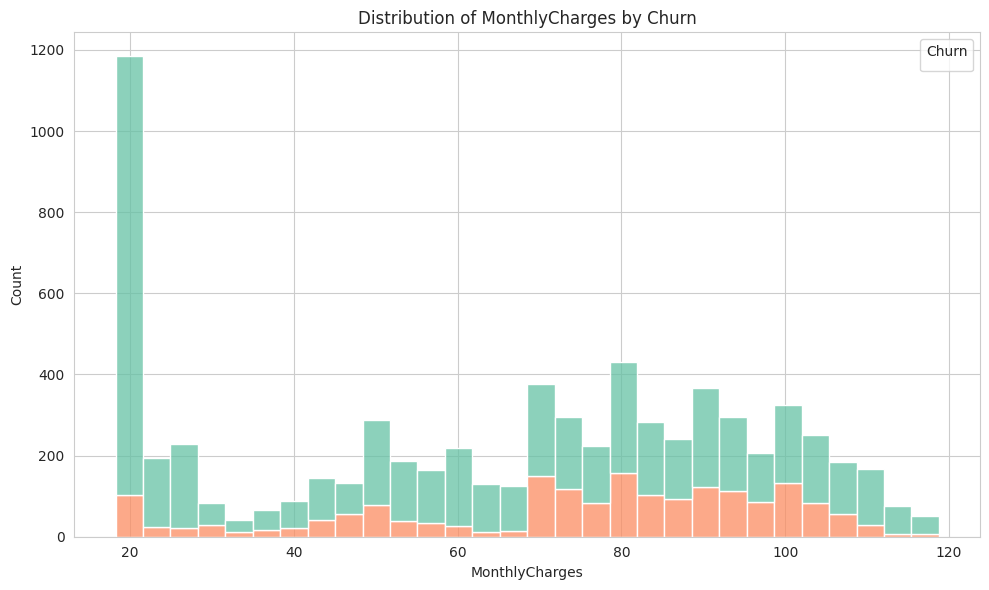

In [44]:
plt.figure(figsize=(10, 6))

sns.histplot(data=churn_data, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')
plt.title('Distribution of MonthlyCharges by Churn')

plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

**Assumptions**:

1. Customers with lower **MonthlyCharges** tend to exhibit a lower likelihood of not returning (**Churn = 0**).
2. A higher expenditure on **MonthlyCharges** correlates with an increased likelihood of customers returning (Churn = 1).

# **Relation between TotalCharges and Churn**

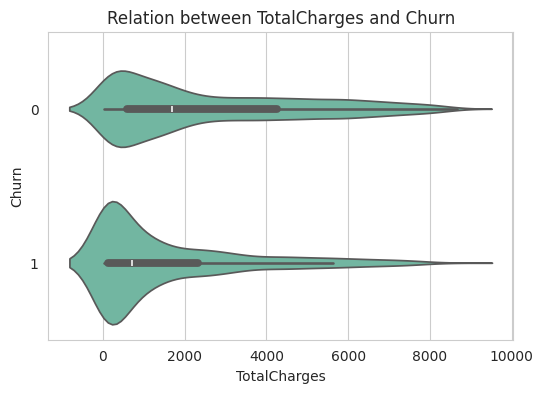

In [45]:
plt.figure(figsize=(6, 4))

sns.violinplot(x='TotalCharges', y='Churn', data=churn_data, orient='h')
plt.xlabel('TotalCharges')
plt.ylabel('Churn')
plt.title('Relation between TotalCharges and Churn')

plt.show()

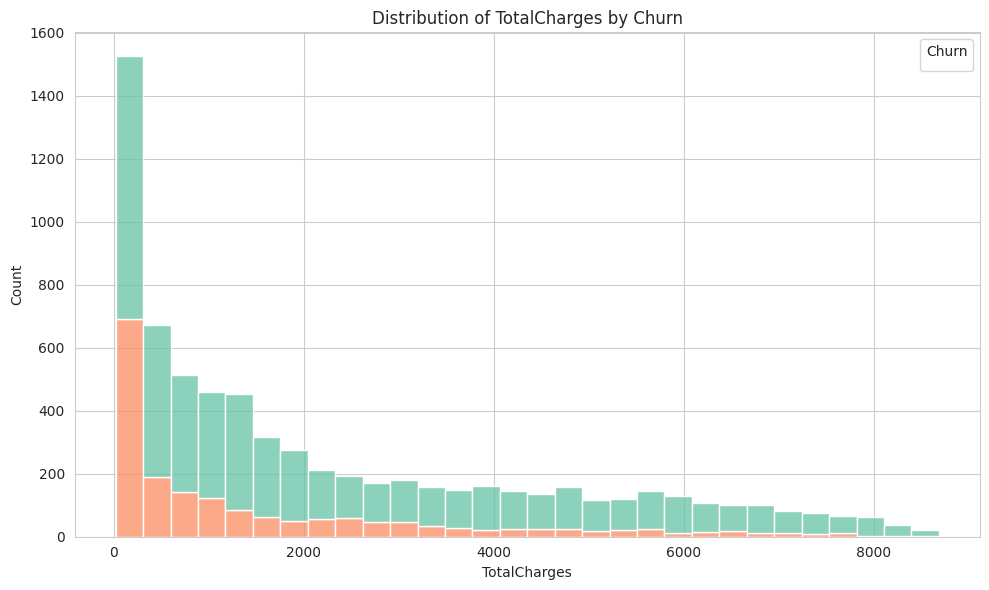

In [46]:
plt.figure(figsize=(10, 6))

sns.histplot(data=churn_data, x='TotalCharges', hue='Churn', multiple='stack', bins=30, legend=True)
plt.xlabel('TotalCharges')
plt.ylabel('Count')
plt.title('Distribution of TotalCharges by Churn')

plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

**Assumptions**:

1. There is a positive correlation between **total charges** and **churn** rate
2. Customers with higher **total charges** are more likely to **churn** than customers with lower **total charges**
3. The distribution of **total charges** is not evenly distributed across all customers
4. The chart suggests that the company may be able to reduce churn by targeting customers with higher **total charges** with specific promotions or incentives. This could help to retain these valuable customers and increase the company's revenue.

### **Modelling**

Handling Outliers

In [47]:
# Create a function to delete potential outliers
def delete_outlier(churn_data, column):
    Q1 = churn_data[column].quantile(0.25)
    Q3 = churn_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    potential_outliers = churn_data[(churn_data[column] < lower_bound) | (churn_data[column] > upper_bound)]
    churn_data.drop(potential_outliers.index, inplace=True)

In [48]:
# Identify columns for Handling Outlier
ho_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Delete Outliers for each column
for i in ho_col:
  delete_outlier(churn_data, i)

# Data Scaling

Method to deal with imbalaced data:SMOTE

In [49]:
X = churn_data.drop(columns=['Churn'])
y = churn_data['Churn']

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(X, y)

# Split Train/Test Set

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3,random_state=42)

# Apply Machine Learning Models

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report,accuracy_score

In [53]:
# Creating a Function for measuring metrics of every model

res = {'Model':[], 'Accuracy':[], 'CV Score':[]}

def metrics(train_predicts, test_predicts, model, ensemble = False, name = ''):

    fig, ax = plt.subplots(1,2, figsize = (10,5))
    fig.suptitle(name)

    print("*"*50)
    print(f'Train Accuracy: - {np.round(accuracy_score(train_predicts, y_train), 2)*100}%')
    print(f'Test Accuracy: - {np.round(accuracy_score(test_predicts, y_test), 2)*100}%')

    print(f'\n**********Classification Report**********\n\n')
    print(classification_report(y_test, test_predicts))

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'**********Cross Validation**********\n\n')

    print(pd.Series(cv_scores))
    print(f'\n\nMean Score: - {np.mean(cv_scores)}\n')

    matrix = confusion_matrix(test_predicts, y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax = ax[0])


    if ensemble == True:
        temp = pd.DataFrame(
        model.feature_importances_,
        index=x_train.columns, columns=['Features']).sort_values('Features', ascending=True)


        ax[1].barh(temp.index, temp['Features'])

    res['Model'].append(name)
    res['Accuracy'].append(np.round(accuracy_score(test_predicts, y_test), 2)*100)
    res['CV Score'].append(np.round(np.mean(cv_scores), 2))

    plt.tight_layout()

# Logistic Regression

In [54]:
# Hyperparameter tunning for Logistic Regression
param_grid = {
    'C': [0.1, 1.0, 10.0, 100],  # Regularization parameter
    'penalty': ['l1', 'l2',None],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver algorithm
    'max_iter': [100, 200, 300, 400, 500]  # Maximum number of iterations
}

scoring = 'accuracy'

grid_search_logistic = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search_logistic.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0, 100],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [55]:
grid_search_logistic.best_estimator_

LogisticRegression(solver='liblinear')

**************************************************
Train Accuracy: - 80.0%
Test Accuracy: - 80.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1574
           1       0.78      0.84      0.81      1531

    accuracy                           0.80      3105
   macro avg       0.81      0.80      0.80      3105
weighted avg       0.81      0.80      0.80      3105

**********Cross Validation**********


0    0.806246
1    0.800568
2    0.785664
3    0.811790
4    0.801136
dtype: float64


Mean Score: - 0.8010806140718755



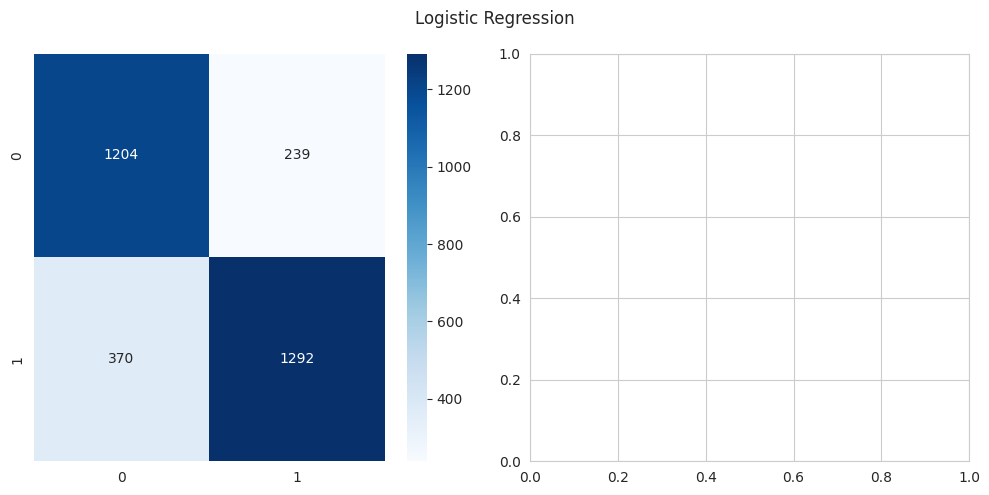

In [56]:
model_logistic = grid_search_logistic.best_estimator_
metrics(model_logistic.predict(x_train), model_logistic.predict(x_test),model=model_logistic, name='Logistic Regression')

# **Decision Tree**

In [57]:
max_depth = [5, 10, 50, 100, 150, 200,500]
min_samples_split = [2,5,10, 12, 14]
min_samples_leaf = [5, 10, 20, 50, 100]

grid_dt_para = {
                'max_depth':max_depth,
                'min_samples_split': min_samples_split,
                'criterion':['gini','entropy',None],
                'min_samples_leaf':min_samples_leaf}

grid_df_CV = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_dt_para, cv=5, scoring='accuracy', n_jobs=-1)

grid_df_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', None],
                         'max_depth': [5, 10, 50, 100, 150, 200, 500],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10, 12, 14]},
             scoring='accuracy')

In [58]:
grid_df_CV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=12)

**************************************************
Train Accuracy: - 86.0%
Test Accuracy: - 81.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1574
           1       0.79      0.83      0.81      1531

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105

**********Cross Validation**********


0    0.779276
1    0.768630
2    0.760823
3    0.750000
4    0.779119
dtype: float64


Mean Score: - 0.767569782727918



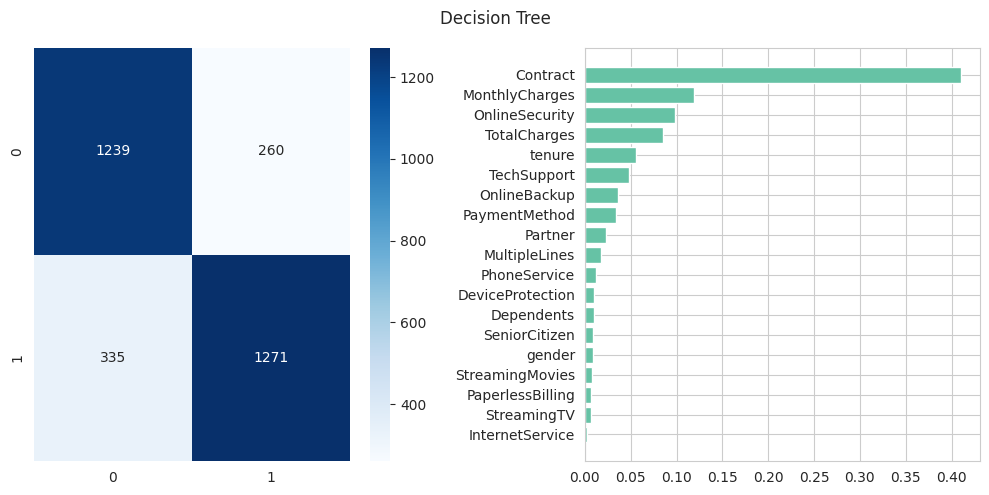

In [59]:
model_dt = grid_df_CV.best_estimator_

metrics(model_dt.predict(x_train), model_dt.predict(x_test), model_dt, ensemble=True, name = 'Decision Tree')

# **Random Forest**

In [60]:
n_estimators = [5, 10, 50,100]
max_depth = [10, 25, 50, 100, 120,500]
min_samples_split = [2,5,10, 15]
min_samples_leaf = [1,2,4,6]

grid_rf_para = {
                'max_depth':max_depth,
                'min_samples_split': min_samples_split,
                'criterion':['gini','entropy',None],
                'min_samples_leaf':min_samples_leaf,
                'n_estimators':n_estimators}

grid_rf_CV = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf_para, cv=5, n_jobs=-1)

grid_rf_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', None],
                         'max_depth': [10, 25, 50, 100, 120, 500],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [5, 10, 50, 100]})

In [61]:
grid_rf_CV.best_estimator_

RandomForestClassifier(max_depth=100)

**************************************************
Train Accuracy: - 100.0%
Test Accuracy: - 84.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1574
           1       0.84      0.85      0.84      1531

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105

**********Cross Validation**********


0    0.791341
1    0.792051
2    0.765791
3    0.797585
4    0.799716
dtype: float64


Mean Score: - 0.789296990934899



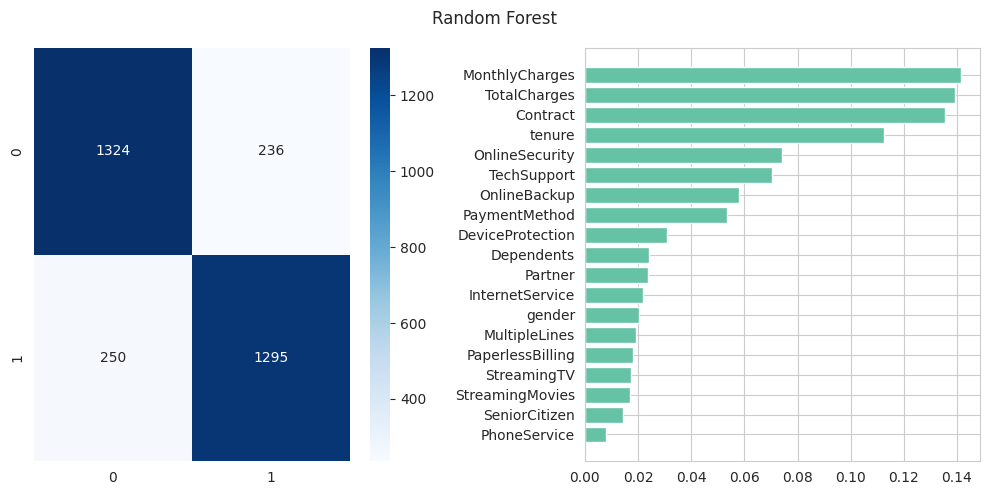

In [62]:
model_rf = grid_rf_CV.best_estimator_

metrics(model_rf.predict(x_train), model_rf.predict(x_test), model= model_rf, name='Random Forest', ensemble=True)

# **Gaussian Naive Bayes**

**************************************************
Train Accuracy: - 77.0%
Test Accuracy: - 78.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1574
           1       0.74      0.86      0.79      1531

    accuracy                           0.78      3105
   macro avg       0.79      0.78      0.78      3105
weighted avg       0.79      0.78      0.78      3105

**********Cross Validation**********


0    0.711852
1    0.712562
2    0.704045
3    0.705256
4    0.711648
dtype: float64


Mean Score: - 0.709072661945932



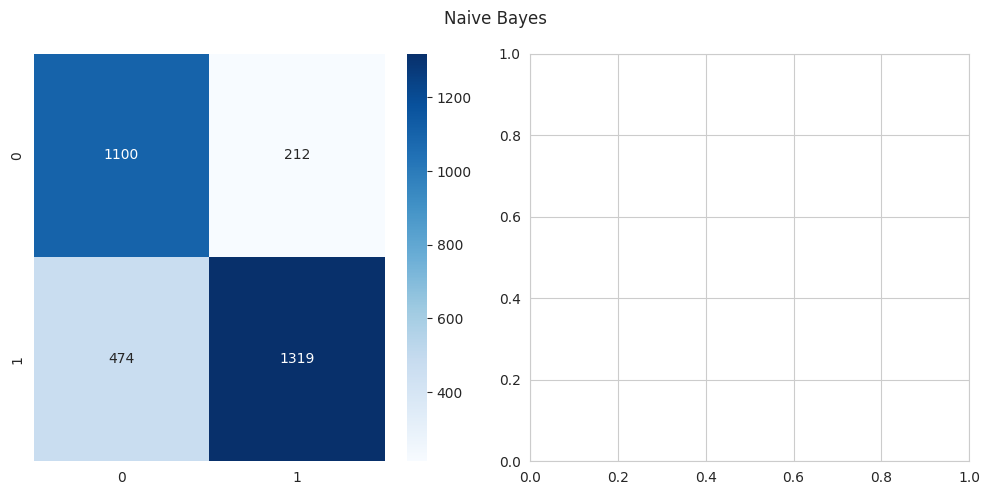

In [63]:
model_nb = GaussianNB().fit(x_train, y_train)

metrics(model_nb.predict(x_train), model_nb.predict(x_test), model=model_nb, name = 'Naive Bayes')

# **Model Evaluation**

In [64]:
compare_model = pd.DataFrame(res)
compare_model.set_index('Model', inplace=True)
compare_model

,Accuracy,CV Score
Model,,
Logistic Regression,80.0,0.80
Decision Tree,81.0,0.77
Random Forest,84.0,0.79
Naive Bayes,78.0,0.71


<Figure size 1000x600 with 0 Axes>

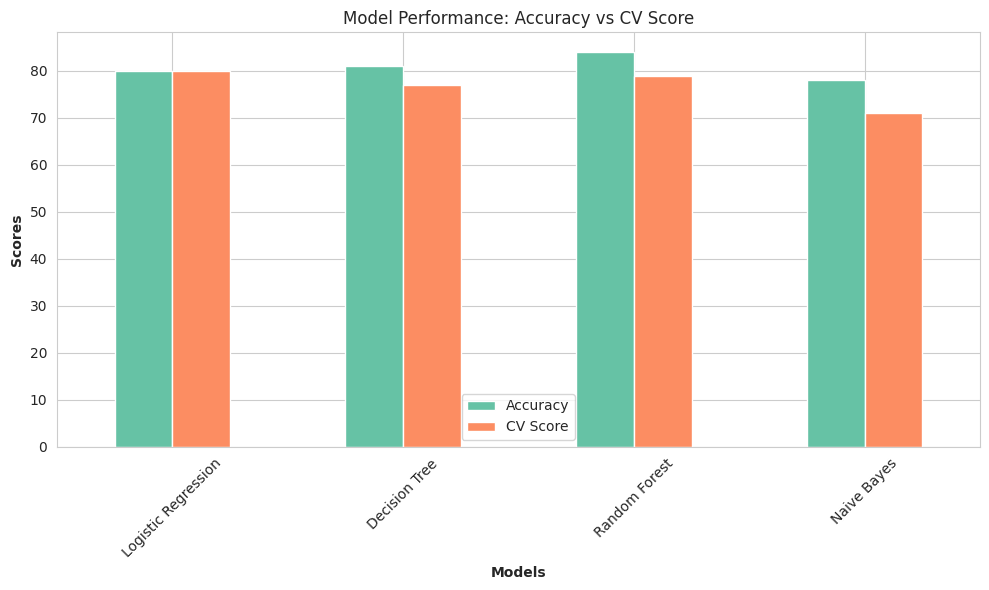

In [65]:
# Build a bar chart for better visualization
compare_model['CV Score'] = compare_model['CV Score'] * 100
plt.figure(figsize=(10, 6))
compare_model.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance: Accuracy vs CV Score')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(['Accuracy', 'CV Score'])
plt.tight_layout()
plt.show()

**Key Observations:**

1. **Random Forest** leads with the highest accuracy of **84.0%**.
2. **Logistic Regression** demonstrates consistent performance with an accuracy of 80.0% and a high **cross-validation** score of **0.81**.
3. **Decision Tree** and **Random Forest** show similar accuracies but vary in their cross-validation scores, indicating differences in generalization capability.
4. **Naive Bayes**, while having a moderate accuracy of 78.0%, shows a lower cross-validation score, suggesting potential limitations in generalizing to new data.